In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bikeShare = pd.read_csv('bikeshare-dataset-2020.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#how many rows (instances)? How many columns (variables)? Describe each of the variables
df_bikeShare.shape[0]

2911309

In [4]:
df_bikeShare.columns

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')

In [5]:
print (df_bikeShare.dtypes)

Trip Id                object
Trip  Duration        float64
Start Station Id       object
Start Time             object
Start Station Name     object
End Station Id         object
End Time               object
End Station Name       object
Bike Id                object
User Type              object
dtype: object


In [6]:
df_bikeShare.nunique()

Trip Id               2911309
Trip  Duration          19947
Start Station Id         1464
Start Time             395679
Start Station Name        679
End Station Id           1465
End Time               395545
End Station Name          700
Bike Id                 12802
User Type                   2
dtype: int64

In [7]:
#How many of the rows contain NA?
df_bikeShare.isnull().sum()

Trip Id                  0
Trip  Duration           1
Start Station Id         1
Start Time               1
Start Station Name     794
End Station Id        1302
End Time                 1
End Station Name      2050
Bike Id                 74
User Type              250
dtype: int64

In [8]:
#small percentage of rows with NA (3142/2911309 rows) - decided to drop all rows with NA
df_bikeShare.dropna(axis='rows', how='any', inplace=False)

Trip Id  Trip  Duration Start Station Id        Start Time  \
0         7334128           648.0             7003  01/01/2020 00:08   
1         7334129           419.0             7007  01/01/2020 00:10   
2         7334130           566.0             7113  01/01/2020 00:13   
3         7334131          1274.0             7333  01/01/2020 00:17   
4         7334132           906.0             7009  01/01/2020 00:19   
...           ...             ...              ...               ...   
2911303  10644213           330.0             7010  12/31/2020 23:52   
2911304  10644214           216.0             7288  12/31/2020 23:54   
2911305  10644215           204.0             7288  12/31/2020 23:54   
2911306  10644216          1659.0             7270  12/31/2020 23:56   
2911307  10644217            63.0             7383  12/31/2020 23:57   

                      Start Station Name End Station Id          End Time  \
0               Madison Ave / Bloor St W           7271  01/01/2020 00:19   
1                  College St / Huron St           7163  01/01/2020 00:17   
2           Parliament St / Aberdeen Ave           7108  01/01/2020 00:22   
3                King St E / Victoria St           7311  01/01/2020 00:38   
4                  King St E / Jarvis St           7004  01/01/2020 00:34   
...                                  ...            ...               ...   
2911303          King St W / Spadina Ave           7216  12/31/2020 23:57   
2911304      Humber Bay Shores Park West           7514  12/31/2020 23:58   
2911305      Humber Bay Shores Park West           7514  12/31/2020 23:58   
2911306  Church St / Dundas St E - SMART           7270  01/01/2021 00:24   
2911307                    12 Harbour St           7383  12/31/2020 23:58   

                                  End Station Name Bike Id      User Type  
0                  Yonge St / Alexander St - SMART    3104  Annual Member  
1                               Yonge St / Wood St    2126  Annual Member  
2                           Front St E / Cherry St    4425  Annual Member  
3                      Sherbourne St / Isabella St    4233  Annual Member  
4                          University Ave / Elm St    2341  Casual Member  
...                                            ...     ...            ...  
2911303              Wellington St W / Stafford St    3458  Annual Member  
2911304  Humber Bay Shores Park / Marine Parade Dr    4085  Annual Member  
2911305  Humber Bay Shores Park / Marine Parade Dr    3580  Annual Member  
2911306            Church St / Dundas St E - SMART    5137  Annual Member  
2911307                              12 Harbour St    5622  Annual Member  

[2908167 rows x 10 columns]

In [9]:
#drop columns not planning to use
df_bikeShare = df_bikeShare.drop(['Trip  Duration', 'End Station Name', 'Start Station Id', 'Trip Id', 'End Time', 'Bike Id', 'User Type', 'End Station Id'], axis = 1)

In [10]:
#looking to create models for the most popular start stations, group by start station name and find top 5 most common start station names
grouped = df_bikeShare.groupby(['Start Station Name']).size()
grouped.sort_values(ascending=False).head(5)

Start Station Name
Queens Quay E / Lower Sherbourne St    30977
Lake Shore Blvd W / Ontario Dr         30481
Marilyn Bell Park Tennis Court         26586
HTO Park (Queens Quay W)               26145
York St / Queens Quay W                25751
dtype: int64

In [11]:
#create a new data frame with only the top 5 stations from the 2020 the dataset
df1 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']
df2 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Lake Shore Blvd W / Ontario Dr']
df3 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Marilyn Bell Park Tennis Court']
df4 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'HTO Park (Queens Quay W)']
df5 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'York St / Queens Quay W']

In [12]:
df_bikeShareTop5 = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [13]:
df_bikeShareTop5.shape[0]

139940

In [14]:
df_bikeShareTop5

Start Time                   Start Station Name
245      01/01/2020 09:12  Queens Quay E / Lower Sherbourne St
246      01/01/2020 09:13  Queens Quay E / Lower Sherbourne St
376      01/01/2020 11:43  Queens Quay E / Lower Sherbourne St
393      01/01/2020 11:58  Queens Quay E / Lower Sherbourne St
408      01/01/2020 12:08  Queens Quay E / Lower Sherbourne St
...                   ...                                  ...
2910563  12/31/2020 17:45              York St / Queens Quay W
2911073  12/31/2020 20:56              York St / Queens Quay W
2911193  12/31/2020 22:05              York St / Queens Quay W
2911220  12/31/2020 22:23              York St / Queens Quay W
2911221  12/31/2020 22:23              York St / Queens Quay W

[139940 rows x 2 columns]

In [15]:
#From Start Time column, pull out day, month, and time columns
df = pd.DataFrame(df_bikeShareTop5)

In [16]:
#convert data type (object) to date time 
from datetime import datetime
df['Start Time'] =  pd.to_datetime(df['Start Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [17]:
df['Start Day'] = df['Start Time'].dt.day
df['Start Month'] = df['Start Time'].dt.month

In [18]:
df['New Start time'] = df['Start Time'].dt.time

In [19]:
df

Start Time                   Start Station Name  Start Day  \
245     2020-01-01 09:12:00  Queens Quay E / Lower Sherbourne St          1   
246     2020-01-01 09:13:00  Queens Quay E / Lower Sherbourne St          1   
376     2020-01-01 11:43:00  Queens Quay E / Lower Sherbourne St          1   
393     2020-01-01 11:58:00  Queens Quay E / Lower Sherbourne St          1   
408     2020-01-01 12:08:00  Queens Quay E / Lower Sherbourne St          1   
...                     ...                                  ...        ...   
2910563 2020-12-31 17:45:00              York St / Queens Quay W         31   
2911073 2020-12-31 20:56:00              York St / Queens Quay W         31   
2911193 2020-12-31 22:05:00              York St / Queens Quay W         31   
2911220 2020-12-31 22:23:00              York St / Queens Quay W         31   
2911221 2020-12-31 22:23:00              York St / Queens Quay W         31   

         Start Month New Start time  
245                1       09:12:00  
246                1       09:13:00  
376                1       11:43:00  
393                1       11:58:00  
408                1       12:08:00  
...              ...            ...  
2910563           12       17:45:00  
2911073           12       20:56:00  
2911193           12       22:05:00  
2911220           12       22:23:00  
2911221           12       22:23:00  

[139940 rows x 5 columns]

In [20]:
# Create the day of week variable
from datetime import datetime
import calendar

In [21]:
df['Date'] = pd.to_datetime(df['Start Time']).dt.date

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.strftime("%m/%d/%Y")

In [23]:
df['Date'] =  pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [24]:
df['Day of Week'] = df['Date'].dt.dayofweek

In [25]:
print(df['Day of Week'])

245        2
246        2
376        2
393        2
408        2
          ..
2910563    3
2911073    3
2911193    3
2911220    3
2911221    3
Name: Day of Week, Length: 139940, dtype: int64


In [26]:
#add temperature and precipitation variables
weather = pd.read_csv('Toronto Weather 2020.csv')

In [27]:
weather.rename(columns={'Date/Time': 'Date'}, inplace=True)

In [28]:
weather

Station Name        Date  Year  Month  Day  Mean Temp (°C)  \
0    TORONTO CITY    1/1/2020  2020      1    1            -0.1   
1    TORONTO CITY    1/2/2020  2020      1    2             3.6   
2    TORONTO CITY    1/3/2020  2020      1    3             5.7   
3    TORONTO CITY    1/4/2020  2020      1    4             2.0   
4    TORONTO CITY    1/5/2020  2020      1    5             0.3   
..            ...         ...   ...    ...  ...             ...   
361  TORONTO CITY  12/27/2020  2020     12   27             1.1   
362  TORONTO CITY  12/28/2020  2020     12   28             1.7   
363  TORONTO CITY  12/29/2020  2020     12   29            -2.3   
364  TORONTO CITY  12/30/2020  2020     12   30             1.7   
365  TORONTO CITY  12/31/2020  2020     12   31             0.7   

     Total Precip (mm)  
0                  0.2  
1                  0.0  
2                  0.0  
3                  1.5  
4                  5.6  
..                 ...  
361                0.5  
362                3.4  
363                0.0  
364                5.9  
365                0.0  

[366 rows x 7 columns]

In [29]:
weather['Date'] =  pd.to_datetime(weather['Date'], format="%m/%d/%Y")

In [30]:
#add weather to main dataset
bikeShareWeather = pd.merge(df, weather, on = "Date")

In [31]:
bikeShareWeather

Start Time                   Start Station Name  Start Day  \
0      2020-01-01 09:12:00  Queens Quay E / Lower Sherbourne St          1   
1      2020-01-01 09:13:00  Queens Quay E / Lower Sherbourne St          1   
2      2020-01-01 11:43:00  Queens Quay E / Lower Sherbourne St          1   
3      2020-01-01 11:58:00  Queens Quay E / Lower Sherbourne St          1   
4      2020-01-01 12:08:00  Queens Quay E / Lower Sherbourne St          1   
...                    ...                                  ...        ...   
139935 2020-12-31 17:45:00              York St / Queens Quay W         31   
139936 2020-12-31 20:56:00              York St / Queens Quay W         31   
139937 2020-12-31 22:05:00              York St / Queens Quay W         31   
139938 2020-12-31 22:23:00              York St / Queens Quay W         31   
139939 2020-12-31 22:23:00              York St / Queens Quay W         31   

        Start Month New Start time       Date  Day of Week  Station Name  \
0                 1       09:12:00 2020-01-01            2  TORONTO CITY   
1                 1       09:13:00 2020-01-01            2  TORONTO CITY   
2                 1       11:43:00 2020-01-01            2  TORONTO CITY   
3                 1       11:58:00 2020-01-01            2  TORONTO CITY   
4                 1       12:08:00 2020-01-01            2  TORONTO CITY   
...             ...            ...        ...          ...           ...   
139935           12       17:45:00 2020-12-31            3  TORONTO CITY   
139936           12       20:56:00 2020-12-31            3  TORONTO CITY   
139937           12       22:05:00 2020-12-31            3  TORONTO CITY   
139938           12       22:23:00 2020-12-31            3  TORONTO CITY   
139939           12       22:23:00 2020-12-31            3  TORONTO CITY   

        Year  Month  Day  Mean Temp (°C)  Total Precip (mm)  
0       2020      1    1            -0.1                0.2  
1       2020      1    1            -0.1                0.2  
2       2020      1    1            -0.1                0.2  
3       2020      1    1            -0.1                0.2  
4       2020      1    1            -0.1                0.2  
...      ...    ...  ...             ...                ...  
139935  2020     12   31             0.7                0.0  
139936  2020     12   31             0.7                0.0  
139937  2020     12   31             0.7                0.0  
139938  2020     12   31             0.7                0.0  
139939  2020     12   31             0.7                0.0  

[139940 rows x 13 columns]

In [32]:
bikeShareWeather = bikeShareWeather.drop(['Start Month', 'Start Day', 'Station Name', 'Year'], axis = 1)

In [33]:
bikeShareWeather

Start Time                   Start Station Name  \
0      2020-01-01 09:12:00  Queens Quay E / Lower Sherbourne St   
1      2020-01-01 09:13:00  Queens Quay E / Lower Sherbourne St   
2      2020-01-01 11:43:00  Queens Quay E / Lower Sherbourne St   
3      2020-01-01 11:58:00  Queens Quay E / Lower Sherbourne St   
4      2020-01-01 12:08:00  Queens Quay E / Lower Sherbourne St   
...                    ...                                  ...   
139935 2020-12-31 17:45:00              York St / Queens Quay W   
139936 2020-12-31 20:56:00              York St / Queens Quay W   
139937 2020-12-31 22:05:00              York St / Queens Quay W   
139938 2020-12-31 22:23:00              York St / Queens Quay W   
139939 2020-12-31 22:23:00              York St / Queens Quay W   

       New Start time       Date  Day of Week  Month  Day  Mean Temp (°C)  \
0            09:12:00 2020-01-01            2      1    1            -0.1   
1            09:13:00 2020-01-01            2      1    1            -0.1   
2            11:43:00 2020-01-01            2      1    1            -0.1   
3            11:58:00 2020-01-01            2      1    1            -0.1   
4            12:08:00 2020-01-01            2      1    1            -0.1   
...               ...        ...          ...    ...  ...             ...   
139935       17:45:00 2020-12-31            3     12   31             0.7   
139936       20:56:00 2020-12-31            3     12   31             0.7   
139937       22:05:00 2020-12-31            3     12   31             0.7   
139938       22:23:00 2020-12-31            3     12   31             0.7   
139939       22:23:00 2020-12-31            3     12   31             0.7   

        Total Precip (mm)  
0                     0.2  
1                     0.2  
2                     0.2  
3                     0.2  
4                     0.2  
...                   ...  
139935                0.0  
139936                0.0  
139937                0.0  
139938                0.0  
139939                0.0  

[139940 rows x 9 columns]

In [34]:
print(bikeShareWeather.dtypes)

Start Time            datetime64[ns]
Start Station Name            object
New Start time                object
Date                  datetime64[ns]
Day of Week                    int64
Month                          int64
Day                            int64
Mean Temp (°C)               float64
Total Precip (mm)            float64
dtype: object


In [35]:
bikeShareWeather['New Start time'] = bikeShareWeather['New Start time'].astype(str)

In [36]:
#convert start time to numeric
bikeShareWeather['New Start time'] = bikeShareWeather['New Start time'].replace(':', '', regex=True).astype(int)

In [37]:
#create morning, afternoon, evening and night classes for start time: Morning = 6:00am - 11:59am = 1; Afternoon = 12:00pm - 5:59pm = 2; evening = 6:00pm - 11:59am = 3; night = 12:00am - 5:59pm = 0
bins = [000000, 60000, 120000, 180000, 240000]
labels = [0, 1, 2, 3, 0]
bikeShareWeather['Time Labels'] = np.array(labels)[np.array(bins).searchsorted(bikeShareWeather['New Start time'])-1]  
bikeShareWeather

Start Time                   Start Station Name  \
0      2020-01-01 09:12:00  Queens Quay E / Lower Sherbourne St   
1      2020-01-01 09:13:00  Queens Quay E / Lower Sherbourne St   
2      2020-01-01 11:43:00  Queens Quay E / Lower Sherbourne St   
3      2020-01-01 11:58:00  Queens Quay E / Lower Sherbourne St   
4      2020-01-01 12:08:00  Queens Quay E / Lower Sherbourne St   
...                    ...                                  ...   
139935 2020-12-31 17:45:00              York St / Queens Quay W   
139936 2020-12-31 20:56:00              York St / Queens Quay W   
139937 2020-12-31 22:05:00              York St / Queens Quay W   
139938 2020-12-31 22:23:00              York St / Queens Quay W   
139939 2020-12-31 22:23:00              York St / Queens Quay W   

        New Start time       Date  Day of Week  Month  Day  Mean Temp (°C)  \
0                91200 2020-01-01            2      1    1            -0.1   
1                91300 2020-01-01            2      1    1            -0.1   
2               114300 2020-01-01            2      1    1            -0.1   
3               115800 2020-01-01            2      1    1            -0.1   
4               120800 2020-01-01            2      1    1            -0.1   
...                ...        ...          ...    ...  ...             ...   
139935          174500 2020-12-31            3     12   31             0.7   
139936          205600 2020-12-31            3     12   31             0.7   
139937          220500 2020-12-31            3     12   31             0.7   
139938          222300 2020-12-31            3     12   31             0.7   
139939          222300 2020-12-31            3     12   31             0.7   

        Total Precip (mm)  Time Labels  
0                     0.2            1  
1                     0.2            1  
2                     0.2            1  
3                     0.2            1  
4                     0.2            2  
...                   ...          ...  
139935                0.0            2  
139936                0.0            3  
139937                0.0            3  
139938                0.0            3  
139939                0.0            3  

[139940 rows x 10 columns]

In [38]:
#don't need old 'Start time' or 'New Start time' columns anymore - drop
df = bikeShareWeather.drop(['Start Time', 'New Start time'], axis = 1)

In [39]:
#group rides by date, time (morning, afternoon, evening, night) and Start Station and create a 'Ride Count' column
bikeShareCount = df.groupby(['Date', 'Time Labels', 'Start Station Name']).size().reset_index(name='Ride Count')

In [40]:
bikeShareCount

Date  Time Labels                   Start Station Name  Ride Count
0    2020-01-01            0             HTO Park (Queens Quay W)           1
1    2020-01-01            1             HTO Park (Queens Quay W)           2
2    2020-01-01            1       Lake Shore Blvd W / Ontario Dr           1
3    2020-01-01            1  Queens Quay E / Lower Sherbourne St           4
4    2020-01-01            1              York St / Queens Quay W           5
...         ...          ...                                  ...         ...
5724 2020-12-31            2       Marilyn Bell Park Tennis Court           9
5725 2020-12-31            2  Queens Quay E / Lower Sherbourne St           9
5726 2020-12-31            2              York St / Queens Quay W           6
5727 2020-12-31            3  Queens Quay E / Lower Sherbourne St           1
5728 2020-12-31            3              York St / Queens Quay W           4

[5729 rows x 4 columns]

In [41]:
bikeShareNew = pd.merge(bikeShareCount, bikeShareWeather, how = 'left', on = ['Date', 'Time Labels', 'Start Station Name'])

In [42]:
bikeShareNew

Date  Time Labels                   Start Station Name  \
0      2020-01-01            0             HTO Park (Queens Quay W)   
1      2020-01-01            1             HTO Park (Queens Quay W)   
2      2020-01-01            1             HTO Park (Queens Quay W)   
3      2020-01-01            1       Lake Shore Blvd W / Ontario Dr   
4      2020-01-01            1  Queens Quay E / Lower Sherbourne St   
...           ...          ...                                  ...   
139935 2020-12-31            3  Queens Quay E / Lower Sherbourne St   
139936 2020-12-31            3              York St / Queens Quay W   
139937 2020-12-31            3              York St / Queens Quay W   
139938 2020-12-31            3              York St / Queens Quay W   
139939 2020-12-31            3              York St / Queens Quay W   

        Ride Count          Start Time  New Start time  Day of Week  Month  \
0                1 2020-01-01 01:08:00           10800            2      1   
1                2 2020-01-01 08:26:00           82600            2      1   
2                2 2020-01-01 08:26:00           82600            2      1   
3                1 2020-01-01 10:36:00          103600            2      1   
4                4 2020-01-01 09:12:00           91200            2      1   
...            ...                 ...             ...          ...    ...   
139935           1 2020-12-31 19:50:00          195000            3     12   
139936           4 2020-12-31 20:56:00          205600            3     12   
139937           4 2020-12-31 22:05:00          220500            3     12   
139938           4 2020-12-31 22:23:00          222300            3     12   
139939           4 2020-12-31 22:23:00          222300            3     12   

        Day  Mean Temp (°C)  Total Precip (mm)  
0         1            -0.1                0.2  
1         1            -0.1                0.2  
2         1            -0.1                0.2  
3         1            -0.1                0.2  
4         1            -0.1                0.2  
...     ...             ...                ...  
139935   31             0.7                0.0  
139936   31             0.7                0.0  
139937   31             0.7                0.0  
139938   31             0.7                0.0  
139939   31             0.7                0.0  

[139940 rows x 11 columns]

In [43]:
bikeShareWeather = bikeShareWeather.drop(['Start Time', 'New Start time'], axis = 1)

In [44]:
bikeShareNew.to_csv('bikeshare2020clean.csv')

In [45]:
bikeShare = pd.read_csv('bikeshare2020clean.csv')

In [46]:
#Exploratory data analysis - begin by visualizing the different variables
import matplotlib.pyplot as plt
import seaborn as sns

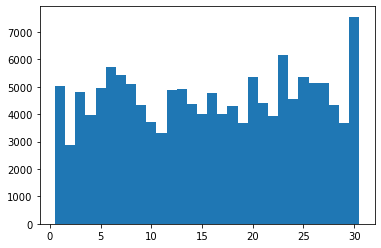

In [47]:
x = bikeShare['Day']
plt.hist(x, bins = 30, align = 'left')
plt.show()

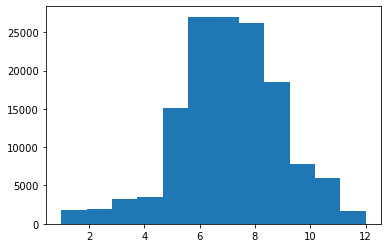

In [48]:
x = bikeShare['Month']
plt.hist(x, bins = 12)
plt.show()
#most popular months for rides are May - September

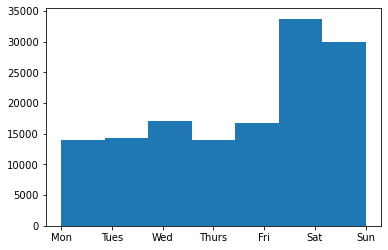

In [49]:
x = bikeShare['Day of Week']
plt.hist(x, bins = 7)
positions = (0, 1, 2, 3, 4, 5, 6)
labels = ("Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun") 
plt.xticks(positions, labels)
plt.show()
#most popular days of the week for rides are Saturday and Sunday

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


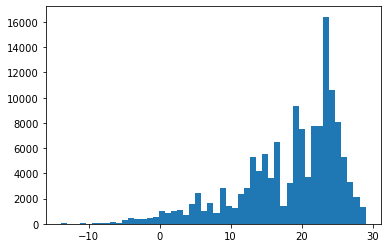

In [50]:
x = bikeShare['Mean Temp (°C)']
plt.hist(x, bins = 50, align = 'left')
plt.show()
#most popular temperatures for rides are 24-25 degrees Celsius)

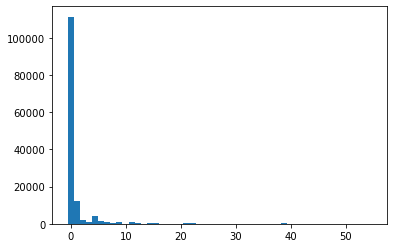

In [51]:
x = bikeShare['Total Precip (mm)']
plt.hist(x, bins = 50, align = 'left')
plt.show()
#as expected, most rides are taken on days when there is 0mm of precipitation that day

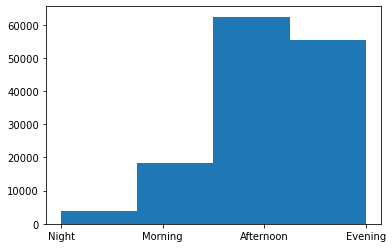

In [52]:
x = bikeShare['Time Labels']
plt.hist(x, bins = 4)
positions = (0, 1, 2, 3)
labels = ("Night", "Morning", "Afternoon", "Evening") 
plt.xticks(positions, labels)
plt.show()
#most rides are taken in the afternoon and evening

In [53]:
bikeShare.isnull().sum()

Unnamed: 0               0
Date                     0
Time Labels              0
Start Station Name       0
Ride Count               0
Start Time               0
New Start time           0
Day of Week              0
Month                    0
Day                      0
Mean Temp (°C)        1014
Total Precip (mm)     1014
dtype: int64

In [54]:
bikeShare.dropna(axis='rows', how='any', inplace=True)

In [55]:
df.to_csv('bikeshare2020model.csv')